# Projeto 2 - CNN

---------------------------------------------

### Participants:
 - Francielle Vargas - 9527629
 - Lucas Nunes Sequeira - 9009642
 - Emanuel Huber - 12110113

#### Date: 08/10/2021

---------------------------------------------

#### Descrição e Instrução

Este notebook foi feito para a disciplina SCC5809 - Redes Neurais

No notebook contém

1. A implementação de redes **CNN**
2. Utilização dos modelos no dataset **QIDER**
3. Importação dos pesos do melhor modelo e imagens (arquivos incluidos na entrega) a serem inferidas ao final do notebook

Para utilizá-lo basta executar todas as células.

_link de acesso ao colab: https://colab.research.google.com/drive/1YytElrNQdwx3itehKCbfxnFgFQhVvCoQ?usp=sharing_

In [ ]:
!nvidia-smi

Wed Oct 27 11:33:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Libs

In [ ]:
# Install Libs
!pip install -U numpy
!pip install tqdm==4.62.0
!pip install plotly==4.4.1
!pip install pandas==1.1.5
!pip install scikit-learn==0.24.2
!pip install tensorflow==2.6.0
!pip install lime==0.2.0.1
!pip install Augmentor==0.2.8

     |████████████████████████████████| 15.7 MB 60 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 76 kB 3.6 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
     |████████████████████████████████| 22.3 MB 4.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.8 MB 185 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.3
    Uninstalling numpy-1.21.3:
      Successfully uninstalled numpy-1.21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have 

     |████████████████████████████████| 275 kB 11.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=30eb69aa0c8bdf2ef7929ef4be05e745df0badc73d8b808493b1f4eb309bf027
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# Math lib
import numpy as np

# Log lib
from tqdm.auto import tqdm

# Image lib
from PIL import Image, ImageOps

# Visualization Lib
import plotly.express as px
import plotly.graph_objects as go

# Copy for deepcopy
import copy

# Pandas for visualization
import pandas as pd
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Iris data
from sklearn.datasets import load_iris

# Split data
from sklearn.model_selection import train_test_split

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import accuracy_score

# Feature selection
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

# TensorFlow e tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.utils.vis_utils import plot_model

# Explainable AI
import lime
from lime import lime_image

# Model customization for Lime
from functools import partial

# Data augmentation
import Augmentor

# OS
import os
import shutil
from google.colab import files
import gdown

# Seed
SEED = 42

# Set random seed
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Load/Prep Data

**Source:**
https://drive.google.com/drive/folders/1DNVXI61CsWMgVkkOW_VRXbDsOrgXMN3C

**Format:**

```
qider.zip/
├── val/
│   ├── angry/
│   │    ├── 0001.png
│   │    ├── ...
│   │    └── 5985.png
|  ...
|   └── surprise/
│        ├── 0001.png
│        ├── ...
│        └── 5985.png
└── train/
    ├── angry/
    │    ├── 0001.png
    │    ├── ...
    │    └── 5985.png
   ...
    └── surprise/
         ├── 0001.png
         ├── ...
         └── 5985.png

```

#### Upload Data

In [ ]:
# Load QIDER files
!rm -r qider.zip
gdown.download('https://drive.google.com/uc?id=1ZlVX8f-hrgKiK4RJV8DO_Bg0Ifzyjr-a', 'qider.zip', quiet=False)

# Extract files
!rm -r qider
!unzip qider.zip -d qider

rm: cannot remove 'qider.zip': No such file or directory


Downloading...
From: https://drive.google.com/uc?id=1ZlVX8f-hrgKiK4RJV8DO_Bg0Ifzyjr-a
To: /content/qider.zip
100%|██████████| 153M/153M [00:01<00:00, 91.5MB/s]


rm: cannot remove 'qider': No such file or directory
Archive:  qider.zip
   creating: qider/train/angry/
  inflating: qider/train/angry/angry_asian_10.jpg  
  inflating: qider/train/angry/angry_asian_101.jpg  
  inflating: qider/train/angry/angry_asian_106.jpg  
  inflating: qider/train/angry/angry_asian_12.jpg  
  inflating: qider/train/angry/angry_asian_126.jpg  
 extracting: qider/train/angry/angry_asian_13.jpg  
 extracting: qider/train/angry/angry_asian_136.jpg  
  inflating: qider/train/angry/angry_asian_138.jpg  
  inflating: qider/train/angry/angry_asian_145.jpg  
  inflating: qider/train/angry/angry_asian_150.jpg  
  inflating: qider/train/angry/angry_asian_167.jpg  
  inflating: qider/train/angry/angry_asian_17.jpg  
  inflating: qider/train/angry/angry_asian_19.jpg  
 extracting: qider/train/angry/angry_asian_2.jpg  
  inflating: qider/train/angry/angry_asian_22.jpg  
  inflating: qider/train/angry/angry_asian_23.jpg  
  inflating: qider/train/angry/angry_asian_26.jpg  
 ext

#### Data Augmentation Pipeline

##### Make Dirs

In [ ]:
CLASS_NAMES = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
AUGMENTATED_PATH = 'qider/train_augmentated'

!rm -r {AUGMENTATED_PATH}

# Create augmentated class dirs

for class_name in CLASS_NAMES:
  os.makedirs(f'{AUGMENTATED_PATH}/{class_name}')

rm: cannot remove 'qider/train_augmentated': No such file or directory


##### Transformation Methods

###### Simple Methods

In [ ]:
def next_image_name(class_name, extension = '.jpg'):
  '''
  Generates a image name such as 00001.jpg
  '''

  # Get current images
  image_names = sorted(os.listdir(f'{AUGMENTATED_PATH}/{class_name}'))

  # Get number of last image
  try:
    last_image_name = image_names[-1]
    last_number = int(last_image_name.split('.')[0])
    next_number = last_number+1
  except:
    next_number = 1

  # Image name
  image_name = str(next_number).zfill(5) + extension

  return image_name

def save_image(image, class_name):
  '''
  Saves a image in the augmentated dir
  '''

  # Get next image name
  image_name = next_image_name(class_name)

  # Save image
  image.save(f'{AUGMENTATED_PATH}/{class_name}/{image_name}')

def mirror(image):
  '''
  Apply left->right mirroring
  '''

  return ImageOps.mirror(image)

def to_grey(image):
  '''
  Convert to grey scale
  '''

  return image.convert('L')

def resize(image, width=256, height=256):
  '''
  Resize Image
  '''

  return image.resize((width, height))

def zoom(image, zoom=2.3):
    '''
    Apply zoom in image
    '''
    
    # Get current image size
    w, h = image.size

    # Apply zoom
    image = image.crop((w/2 - w / zoom, h/2 - h / zoom, 
                        w/2 + w / zoom, h/2 + h / zoom))
    
    return image.resize((w, h), Image.LANCZOS)

def random_rotation(image, max_ang=7):

  # Get angle
  ang = np.random.randint(-max_ang, max_ang+1)

  # Rotate
  image = image.rotate(ang)

  # Zoom image
  image = zoom(image)

  return image

from skimage.util import random_noise

def add_noise(image, format="L"):

  # Convert to array
  img = np.array(image)

  # Add noise to the image.
  noise_img = random_noise(img, mode='gaussian', seed=SEED)

  # Convert image
  return Image.fromarray(np.array(255*noise_img, dtype = 'uint8')).convert(format)

###### Ageing GAN

ref: https://github.com/HasnainRaz/Fast-AgingGAN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import torch

class ResidualBlock(nn.Module):
  def __init__(self, in_features):
    super(ResidualBlock, self).__init__()

    conv_block = [nn.ReflectionPad2d(1),
                  nn.Conv2d(in_features, in_features, 3),
                  nn.BatchNorm2d(in_features),
                  nn.ReLU(),
                  nn.ReflectionPad2d(1),
                  nn.Conv2d(in_features, in_features, 3),
                  nn.BatchNorm2d(in_features)]

    self.conv_block = nn.Sequential(*conv_block)

  def forward(self, x):
    return x + self.conv_block(x)


class Generator(nn.Module):
  def __init__(self, ngf, n_residual_blocks=9):
    super(Generator, self).__init__()

    # Initial convolution block
    model = [nn.ReflectionPad2d(3),
              nn.Conv2d(3, ngf, 7),
              nn.BatchNorm2d(ngf),
              nn.ReLU()]

    # Downsampling
    in_features = ngf
    out_features = in_features * 2
    for _ in range(2):
      model += [nn.Conv2d(in_features, out_features, 3, stride=2, padding=1),
                nn.BatchNorm2d(out_features),
                nn.ReLU()]
      in_features = out_features
      out_features = in_features * 2

    # Residual blocks
    for _ in range(n_residual_blocks):
      model += [ResidualBlock(in_features)]

    # Upsampling
    out_features = in_features // 2
    for _ in range(2):
      model += [nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1),
                nn.BatchNorm2d(out_features),
                nn.ReLU()]
      in_features = out_features
      out_features = in_features // 2

    # Output layer
    model += [nn.ReflectionPad2d(3),
              nn.Conv2d(ngf, 3, 7),
              nn.Tanh()]

    self.model = nn.Sequential(*model)

  def forward(self, x):
    return self.model(x)

def age_augmentation(images, format="L", width=256, height=256):

  # Appy transformations
  transformated_images = torch.cat([GAN_TRANSFORMATIONS(img).unsqueeze(0) for img in images])

  # Apply GAN
  aged_tensors = GAN_MODEL(transformated_images).detach()
  
  # Restore new images
  new_images = []
  for i in range(len(aged_tensors)):

    img = Image.fromarray((((aged_tensors[i].permute(1, 2, 0).numpy() + 1.0) / 2.0)*255).astype(np.uint8)).convert(format)
    img = resize(img, width, height)
    new_images.append(
        img
    )

  return new_images

##

# Downlaod Weights
!rm -r state_dict.pth
gdown.download('https://drive.google.com/uc?id=1IpaEZNe2RTlFzrT2S3fwgS5ai2kGWji4', 'state_dict.pth', quiet=False)

# Load GAN
GAN_MODEL = Generator(ngf=32, n_residual_blocks=9)
GAN_MODEL.load_state_dict(
    torch.load('state_dict.pth', map_location=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
)
GAN_MODEL.eval()

# Transformations for GAN
GAN_TRANSFORMATIONS = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

rm: cannot remove 'state_dict.pth': No such file or directory


Downloading...
From: https://drive.google.com/uc?id=1IpaEZNe2RTlFzrT2S3fwgS5ai2kGWji4
To: /content/state_dict.pth
100%|██████████| 11.5M/11.5M [00:00<00:00, 68.7MB/s]


##### Transformations

In [ ]:
# Apply Transformations
IMAGE_SIZE = (256, 256)
np.random.seed(SEED)
rotation_probability = 0.3
ageing_probability = 0.05
noise_probability = 0.1

for class_name in tqdm(CLASS_NAMES):

  # Get Image names
  image_names = os.listdir(f'qider/train/{class_name}')

  # Iterate over each image
  for image_name in tqdm(image_names, leave=False):

    # Array of images to save
    new_images = []

    # Load Image
    image = Image.open(f'qider/train/{class_name}/{image_name}')

    # Reshape
    image = resize(image, IMAGE_SIZE[0], IMAGE_SIZE[1])

    # to grey
    image = to_grey(image)

    # Add to array of images
    new_images.append(image.copy())

    # Mirror
    image = mirror(image)

    # Add to array of images
    new_images.append(image.copy())

    # Apply random rotations
    for image in new_images:
      if rotation_probability > np.random.random():
        new_images.append(random_rotation(image.copy()))

    # Apply random ageing
    for image in new_images:
      if ageing_probability > np.random.random():
        new_images.append(
            age_augmentation([image.copy().convert('RGB')], width=IMAGE_SIZE[0], height=IMAGE_SIZE[1])[0]
          )
        
    # Apply random noise
    for image in new_images:
      if noise_probability > np.random.random():
        new_images.append(
            add_noise(image.copy())
          )

    # Save images
    for image in new_images:
      save_image(image, class_name)


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

  0%|          | 0/746 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/424 [00:00<?, ?it/s]

  0%|          | 0/404 [00:00<?, ?it/s]

#### Load train/val

In [ ]:
BATCH_SIZE = 32

# Load Data
train_ds = tf.keras.preprocessing.image_dataset_from_directory("qider/train_augmentated", 
                                                               shuffle=True,
                                                               color_mode='grayscale',
                                                               seed=SEED,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMAGE_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory("qider/val", 
                                                             shuffle=False,
                                                             color_mode='grayscale',
                                                             seed=SEED,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=IMAGE_SIZE)

# Remove extra dimention
train_ds = train_ds.map(lambda x, y: (tf.squeeze(x, 3), y))
val_ds = val_ds.map(lambda x, y: (tf.squeeze(x, 3), y))

Found 7645 files belonging to 7 classes.
Found 1000 files belonging to 7 classes.


#### Visualize data

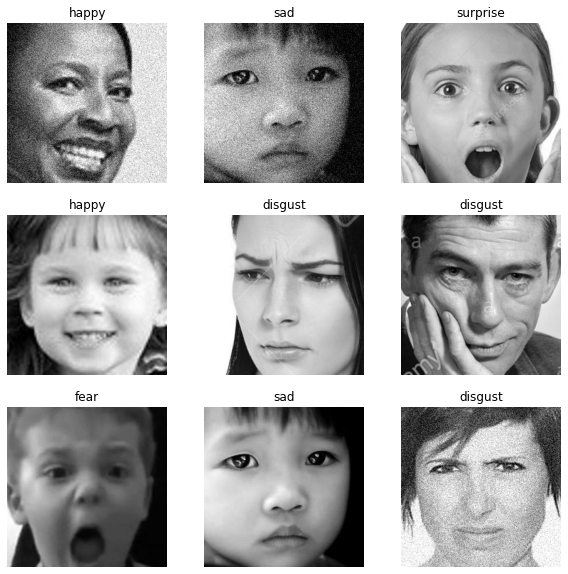

In [ ]:
# Initialize Figure
plt.figure(figsize=(10, 10))
figures = 9
# Iterate over train dataset first batch
for images, labels in train_ds.take(1):
  for i in range(figures):
    # Subplot
    ax = plt.subplot(3, 3, i + 1)

    # Show data
    plt.imshow(images[i].numpy(), cmap="gray")
    plt.title(CLASS_NAMES[int(labels[i])])
    plt.axis("off")

### Build Models

- Modelagem de dois modelos distintos
  - Simple CNN
  - Simple Xception

#### Simple CNN

In [ ]:
def build_simple_cnn(input_shape, num_classes):

    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Normalization
    x = keras.layers.Rescaling(1.0 / 255)(inputs)

    # First Conv Layer
    x = keras.layers.Conv1D(32, 5)(x)
    x = keras.layers.MaxPool1D(5)(x)
    x = keras.layers.Dropout(0.2)(x)

    # Second Conv Layer
    x = keras.layers.Conv1D(32, 5)(x)
    x = keras.layers.MaxPool1D(5)(x)
    x = keras.layers.Dropout(0.2)(x)

    # Flatten layer
    x = keras.layers.Flatten()(x)

    # Fully conected layers
    x = keras.layers.Dense(128)(x)
    x = keras.layers.Dense(64)(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(inputs, outputs, name="SimpleCNN")

Model: "SimpleCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256)]        0         
_________________________________________________________________
rescaling (Rescaling)        (None, 256, 256)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 252, 32)           40992     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 32)             0 

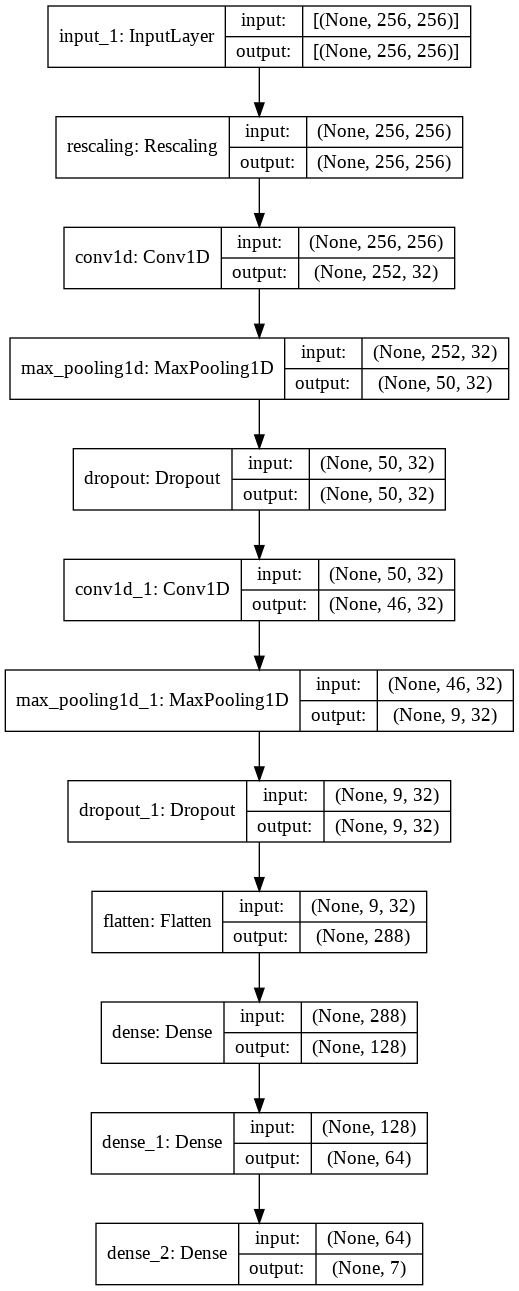

In [ ]:
# Build model
simple_cnn_model = build_simple_cnn(input_shape=IMAGE_SIZE, num_classes=len(CLASS_NAMES))

# Compile model
simple_cnn_model.compile(optimizer=tf.optimizers.Adam(),
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

simple_cnn_model.summary()
keras.utils.plot_model(simple_cnn_model, show_shapes=True)

#### Simple Xception

In [ ]:
def build_simple_xception(input_shape, num_classes):

    # Input layer
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Rescaling(1.0 / 255)(inputs)

    # First Conv Layer
    x = keras.layers.Conv1D(32, 3, strides=2, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    # Second Conv Layer
    x = keras.layers.Conv1D(64, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    # Save residual
    previous_block_activation = x  # Set aside residual

    # Iteration CNN-Activation Blocks
    for size in [128, 256, 512, 728]:

      # First step
      x = keras.layers.Activation("relu")(x)
      x = keras.layers.SeparableConv1D(size, 3, padding="same")(x)
      x = keras.layers.BatchNormalization()(x)

      # Second step
      x = keras.layers.Activation("relu")(x)
      x = keras.layers.SeparableConv1D(size, 3, padding="same")(x)
      x = keras.layers.BatchNormalization()(x)

      # Pooling
      x = keras.layers.MaxPooling1D(3, strides=2, padding="same")(x)

      # Project residual
      residual = keras.layers.Conv1D(size, 1, strides=2, padding="same")(
          previous_block_activation
      )
      x = keras.layers.add([x, residual])  # Add back residual
      previous_block_activation = x  # Set aside next residual

    # Last Block
    x = keras.layers.SeparableConv1D(1024, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.GlobalAveragePooling1D()(x)
    x = keras.layers.Dropout(0.5)(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
    
    return keras.Model(inputs, outputs, name="SimpleXception")

Model: "SimpleXception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256)]   0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 256, 256)     0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 128, 32)      24608       rescaling_1[0][0]                
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 32)      128         conv1d_2[0][0]                   
_____________________________________________________________________________________

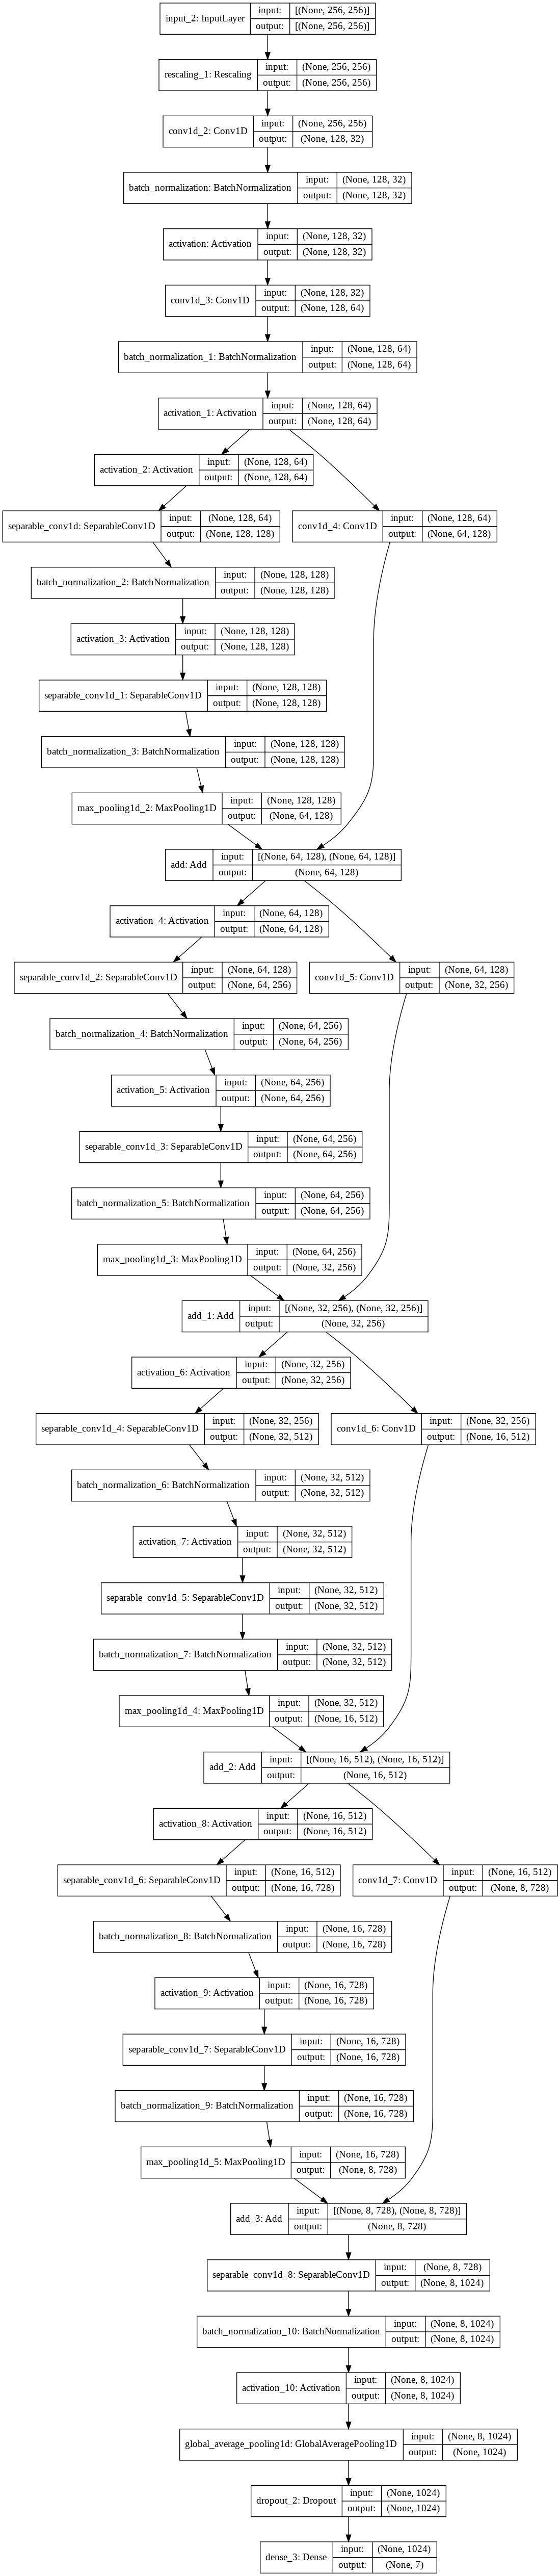

In [ ]:
# Build model
simple_xception_model = build_simple_xception(input_shape=IMAGE_SIZE, num_classes=len(CLASS_NAMES))

# Compile model
simple_xception_model.compile(optimizer=tf.optimizers.Adam(),
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

simple_xception_model.summary()
keras.utils.plot_model(simple_xception_model, show_shapes=True)

#### Transfer Xception

In [ ]:
def build_transfer_xception(input_shape, num_classes, n_layers_trainable = 15):

  # INPUT BLOCK #

  # Input layer
  inputs = keras.Input(shape=(input_shape))

  # Normalization
  x = keras.layers.Rescaling(1.0 / 255)(inputs)

  # Stack (2D to 3D image)
  x = tf.stack([x, x, x], axis=3)

  # XCEPTION BLOCK #

  xception_block = keras.applications.Xception(weights='imagenet', include_top=False, input_tensor=x)
  # Freezing layers
  for layer in xception_block.layers:
      layer.trainable = False

  # TRANSFER LEARNING BLOCK #

  x = keras.layers.GlobalAveragePooling2D()(xception_block.output)
  x = keras.layers.Dense(256, activation='relu')(x)
  x = keras.layers.Dropout(0.8)(x)
  x = keras.layers.Dense(128, activation='relu')(x)

  outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

  model = keras.Model(inputs=inputs, outputs=outputs, name="TransferXception")

  # Set last n layers to be trainable #
  for i in range(len(model.layers) - n_layers_trainable):
    model.layers[i].trainable = False

  return model

In [ ]:
# Build model
transfer_xception_model = build_transfer_xception(input_shape=IMAGE_SIZE, num_classes=len(CLASS_NAMES))

# Compile model
transfer_xception_model.compile(optimizer=tf.optimizers.Adam(),
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])

transfer_xception_model.summary()
keras.utils.plot_model(transfer_xception_model, show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

#### Transfer DenseNet201

In [ ]:
def build_transfer_densenet201(input_shape, num_classes, n_layers_trainable = 30):

  # INPUT BLOCK #

  # Input layer
  inputs = keras.Input(shape=(input_shape))

  # Normalization
  x = keras.layers.Rescaling(1.0 / 255)(inputs)

  # Stack (2D to 3D image)
  x = tf.stack([x, x, x], axis=3)

  # DENSENET201 BLOCK #

  xception_block = keras.applications.DenseNet201(weights='imagenet', include_top=False, input_tensor=x)

  # Freezing layers
  for layer in xception_block.layers:
      layer.trainable = False

  # TRANSFER LEARNING BLOCK #

  x = keras.layers.GlobalAveragePooling2D()(xception_block.output)
  x = keras.layers.Dense(256, activation='elu')(x)
  x = keras.layers.Dropout(0.8)(x)
  x = keras.layers.Dense(128, activation='elu')(x)

  outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

  model = keras.Model(inputs=inputs, outputs=outputs, name="TransferDenseNet201")

  # Set last n layers to be trainable #
  for i in range(len(model.layers) - n_layers_trainable):
    model.layers[i].trainable = False

  return model

In [ ]:
# Build model
transfer_densenet201_model = build_transfer_densenet201(input_shape=IMAGE_SIZE, num_classes=len(CLASS_NAMES))

# Compile model
transfer_densenet201_model.compile(optimizer=tf.optimizers.Adam(),
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])

transfer_densenet201_model.summary()
keras.utils.plot_model(transfer_densenet201_model, show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

### Train Models

- Treinamento dos modelos considerando:
  - Adam optimizer
  - loss: sparse_categorical_crossentropy
  - métrica: accuracy
  - épocas: 10

#### Simple CNN

In [ ]:
max_epochs = 10

# Buffer data
train = train_ds.prefetch(buffer_size=32)
val = val_ds.prefetch(buffer_size=32)

# Train
simple_cnn_history = simple_cnn_model.fit(train, validation_data=val, epochs=max_epochs)

Epoch 1/10
239/239 [==============================] - 37s 27ms/step - loss: 1.8640 - accuracy: 0.3062 - val_loss: 1.4232 - val_accuracy: 0.5100
Epoch 2/10
239/239 [==============================] - 7s 27ms/step - loss: 1.5771 - accuracy: 0.3957 - val_loss: 1.5664 - val_accuracy: 0.4280
Epoch 3/10
239/239 [==============================] - 7s 28ms/step - loss: 1.4944 - accuracy: 0.4385 - val_loss: 1.6912 - val_accuracy: 0.3840
Epoch 4/10
239/239 [==============================] - 7s 28ms/step - loss: 1.4476 - accuracy: 0.4534 - val_loss: 1.5039 - val_accuracy: 0.4830
Epoch 5/10
239/239 [==============================] - 7s 28ms/step - loss: 1.4133 - accuracy: 0.4743 - val_loss: 1.2584 - val_accuracy: 0.5840
Epoch 6/10
239/239 [==============================] - 7s 28ms/step - loss: 1.3812 - accuracy: 0.4906 - val_loss: 1.3517 - val_accuracy: 0.5190
Epoch 7/10
239/239 [==============================] - 7s 28ms/step - loss: 1.3693 - accuracy: 0.4900 - val_loss: 1.3580 - val_accuracy: 0.536

#### Simple Xception

In [ ]:
max_epochs = 10

# Buffer data
train = train_ds.prefetch(buffer_size=32)
val = val_ds.prefetch(buffer_size=32)

# Train
simple_xception_history = simple_xception_model.fit(train, validation_data=val, epochs=max_epochs)

Epoch 1/10
239/239 [==============================] - 22s 65ms/step - loss: 1.7638 - accuracy: 0.3456 - val_loss: 2.1249 - val_accuracy: 0.1060
Epoch 2/10
239/239 [==============================] - 13s 53ms/step - loss: 1.3371 - accuracy: 0.5067 - val_loss: 2.2276 - val_accuracy: 0.1720
Epoch 3/10
239/239 [==============================] - 13s 53ms/step - loss: 0.9946 - accuracy: 0.6421 - val_loss: 2.5079 - val_accuracy: 0.3070
Epoch 4/10
239/239 [==============================] - 13s 54ms/step - loss: 0.6785 - accuracy: 0.7682 - val_loss: 2.2998 - val_accuracy: 0.4190
Epoch 5/10
239/239 [==============================] - 13s 54ms/step - loss: 0.4433 - accuracy: 0.8531 - val_loss: 2.3370 - val_accuracy: 0.4230
Epoch 6/10
239/239 [==============================] - 13s 53ms/step - loss: 0.2930 - accuracy: 0.9050 - val_loss: 2.1194 - val_accuracy: 0.4870
Epoch 7/10
239/239 [==============================] - 13s 54ms/step - loss: 0.2384 - accuracy: 0.9209 - val_loss: 2.1133 - val_accuracy:

#### Transfer Xception

In [ ]:
max_epochs = 10

# Buffer data
train = train_ds.prefetch(buffer_size=32)
val = val_ds.prefetch(buffer_size=32)

# Train
transfer_xception_history = transfer_xception_model.fit(train, validation_data=val, epochs=max_epochs)

Epoch 1/10
239/239 [==============================] - 116s 466ms/step - loss: 1.7598 - accuracy: 0.3112 - val_loss: 1.4487 - val_accuracy: 0.5170
Epoch 2/10
239/239 [==============================] - 108s 452ms/step - loss: 1.6164 - accuracy: 0.3771 - val_loss: 1.3948 - val_accuracy: 0.5150
Epoch 3/10
239/239 [==============================] - 108s 452ms/step - loss: 1.5557 - accuracy: 0.4003 - val_loss: 1.3306 - val_accuracy: 0.5200
Epoch 4/10
239/239 [==============================] - 108s 452ms/step - loss: 1.4820 - accuracy: 0.4226 - val_loss: 1.2654 - val_accuracy: 0.5610
Epoch 5/10
239/239 [==============================] - 108s 452ms/step - loss: 1.4298 - accuracy: 0.4496 - val_loss: 1.2122 - val_accuracy: 0.5950
Epoch 6/10
239/239 [==============================] - 108s 452ms/step - loss: 1.3945 - accuracy: 0.4672 - val_loss: 1.2408 - val_accuracy: 0.5540
Epoch 7/10
239/239 [==============================] - 108s 452ms/step - loss: 1.3513 - accuracy: 0.4789 - val_loss: 1.2274 -

In [ ]:
# Save Model Weights
transfer_xception_model.save_weights('model_weights.h5')

#### Transfer DenseNet201

In [ ]:
max_epochs = 10

# Buffer data
train = train_ds.prefetch(buffer_size=32)
val = val_ds.prefetch(buffer_size=32)

# Train
transfer_densenet201_history = transfer_densenet201_model.fit(train, validation_data=val, epochs=max_epochs)

Epoch 1/10
239/239 [==============================] - 145s 539ms/step - loss: 1.9743 - accuracy: 0.2989 - val_loss: 1.4403 - val_accuracy: 0.4960
Epoch 2/10
239/239 [==============================] - 114s 478ms/step - loss: 1.5763 - accuracy: 0.4115 - val_loss: 1.3265 - val_accuracy: 0.5350
Epoch 3/10
239/239 [==============================] - 114s 477ms/step - loss: 1.4278 - accuracy: 0.4623 - val_loss: 1.1065 - val_accuracy: 0.6030
Epoch 4/10
239/239 [==============================] - 115s 479ms/step - loss: 1.3320 - accuracy: 0.4964 - val_loss: 1.1438 - val_accuracy: 0.5860
Epoch 5/10
239/239 [==============================] - 115s 479ms/step - loss: 1.2599 - accuracy: 0.5271 - val_loss: 1.0427 - val_accuracy: 0.6340
Epoch 6/10
239/239 [==============================] - 114s 478ms/step - loss: 1.2012 - accuracy: 0.5538 - val_loss: 1.0737 - val_accuracy: 0.6260
Epoch 7/10
239/239 [==============================] - 115s 479ms/step - loss: 1.1547 - accuracy: 0.5693 - val_loss: 0.9984 -

### Visualize Train/Validation

**Resultados (train/validation):**

| Modelo   | Loss (train) | Acurácia (train) | Loss (val) | Acurácia (val) | Time (seg/epoch - GPU) |
|----------|-------|----------|----------|----------|----------|
| Simple CNN | 1.30 | 0.51  | 1.22±0.2  | 0.56±0.03 | 7 |
| Simple Xception  | 0.13 | 0.95  | 2.12±0.3  | 0.50±0.07 | 13 |
| Transfer Xception  | 1.28 | 0.51  | 1.16±0.05  | 0.62±0.01  | 100 |
| Transfer DenseNet201  | 1.02 | 0.61  | 0.98±0.02  | 0.63±0.01  | 108 |

In [ ]:
# X values (epochs)
x = np.arange(1, max_epochs+1)

# Y values (accuracy)
simple_cnn_accuracy = simple_cnn_history.history['accuracy']
simple_xception_accuracy = simple_xception_history.history['accuracy']
transfer_xception_accuracy = transfer_xception_history.history['accuracy']
transfer_densenet201_accuracy = transfer_densenet201_history.history['accuracy']

simple_cnn_accuracy_val = simple_cnn_history.history['val_accuracy']
simple_xception_accuracy_val = simple_xception_history.history['val_accuracy']
transfer_xception_accuracy_val = transfer_xception_history.history['val_accuracy']
transfer_densenet201_accuracy_val = transfer_densenet201_history.history['val_accuracy']

# Create figure / add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=simple_cnn_accuracy,
                    mode='lines',
                    name='Simple CNN Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=simple_cnn_accuracy_val,
                    mode='lines',
                    name='Simple CNN Model (Validation)'))

fig.add_trace(go.Scatter(x=x, y=simple_xception_accuracy,
                    mode='lines',
                    name='Simple Xception Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=simple_xception_accuracy_val,
                    mode='lines',
                    name='Simple Xception Model (Validation)'))

fig.add_trace(go.Scatter(x=x, y=transfer_xception_accuracy,
                    mode='lines',
                    name='Transfer Xception Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=transfer_xception_accuracy_val,
                    mode='lines',
                    name='Transfer Xception Model (Validation)'))

fig.add_trace(go.Scatter(x=x, y=transfer_densenet201_accuracy,
                    mode='lines',
                    name='Transfer DenseNet201 Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=transfer_densenet201_accuracy_val,
                    mode='lines',
                    name='Transfer DenseNet201 Model (Validation)'))


fig.update_layout(title="Train/Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
fig.show()

In [ ]:
# X values (epochs)
x = np.arange(1, max_epochs+1)

# Y values (loss)
simple_cnn_loss = simple_cnn_history.history['loss']
simple_xception_loss = simple_xception_history.history['loss']
transfer_xception_loss = transfer_xception_history.history['loss']
transfer_densenet201_loss = transfer_densenet201_history.history['loss']

simple_cnn_loss_val = simple_cnn_history.history['val_loss']
simple_xception_loss_val = simple_xception_history.history['val_loss']
transfer_xception_loss_val = transfer_xception_history.history['val_loss']
transfer_densenet201_loss_val = transfer_densenet201_history.history['val_loss']

# Create figure / add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=simple_cnn_loss,
                    mode='lines',
                    name='Simple CNN Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=simple_cnn_loss_val,
                    mode='lines',
                    name='Simple CNN Model (Validation)'))

fig.add_trace(go.Scatter(x=x, y=simple_xception_loss,
                    mode='lines',
                    name='Simple Xception Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=simple_xception_loss_val,
                    mode='lines',
                    name='Simple Xception Model (Validation)'))

fig.add_trace(go.Scatter(x=x, y=transfer_xception_loss,
                    mode='lines',
                    name='Transfer Xception Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=transfer_xception_loss_val,
                    mode='lines',
                    name='Transfer Xception Model (Validation)'))

fig.add_trace(go.Scatter(x=x, y=transfer_densenet201_loss,
                    mode='lines',
                    name='Transfer DenseNet201 Model (Train)'))

fig.add_trace(go.Scatter(x=x, y=transfer_densenet201_loss_val,
                    mode='lines',
                    name='Transfer DenseNet201 Model (Validation)'))


fig.update_layout(title="Train/Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
fig.show()

### Predictions

#### Methods

In [43]:
from google.colab import files

def load_input():
  '''
  Load model weights and input images for prediction
  '''

  # Manage directory
  try:
    shutil.rmtree('input_files')
  except:
    pass

  try:
    os.makedirs('input_files')
  except:
    pass

  # Load Model Weights
  print("Por favor, faça o upload dos pesos do modelo ('model_weights.h5'):")
  uploaded = files.upload()

  # Get model weight filename and move to input folder
  weights_filename = list(uploaded.keys())[0]
  os.replace(weights_filename, f'input_files/{weights_filename}')

  # Load weights
  best_model = build_transfer_xception(input_shape=IMAGE_SIZE, num_classes=len(CLASS_NAMES))
  best_model.load_weights(f'input_files/{weights_filename}')

  # Load file
  print("Por favor, faça o upload de imagens quadradas:")
  uploaded = files.upload()

  # Get image names
  image_names = list(uploaded.keys())

  # Move, assert and preprocess each image
  images = []
  for image_name in image_names:

    # Move to input folder
    os.replace(image_name, f'input_files/{image_name}')

    # Load Image
    image = Image.open(f'input_files/{image_name}')

    # Assert image size to be a square
    assert image.size[0] == image.size[1], f'A imagem ({image_name}) deve ser quadrada. Tamanho da imagem: {image.size}'

    # Apply transformations
    image = resize(image, IMAGE_SIZE[0], IMAGE_SIZE[1])
    image = to_grey(image)
    img_arr = transform_input(image)

    # Append image
    images.append(img_arr)

  return np.array(images), best_model

def transform_input(image):
  '''
  Transform input to match Net
  '''

  # Apply transformations
  image = resize(image, IMAGE_SIZE[0], IMAGE_SIZE[1])
  img_arr = np.array(to_grey(image))

  return img_arr

def predict(images, model):
  '''
  Make prediction and return most probable classes
  '''
  # Predictions
  logits = model.predict(images)

  # Apply argmax
  predictions = np.argmax(logits, axis=1)

  # Get class name
  class_names = [CLASS_NAMES[prediction] for prediction in predictions]

  return class_names

def show_predictions(images, predictions, model_name):

  # Initialize Figure
  plt.figure(figsize=(10, 10))

  # Iterate over each result and image
  for i, (image, label) in enumerate(zip(images, predictions)):

      # Subplot
      ax = plt.subplot(3, 3, i + 1)

      # Show data
      plt.imshow(image, cmap='gray')
      plt.title(label + ' - ' + model_name)
      plt.axis("off")

#### Run Predictions

##### Load Test Data

rm: cannot remove 'input_files.zip': No such file or directory


Downloading...
From: https://drive.google.com/uc?id=13gjQ-4trAIwx-YkM9p29G-fVlRtBlTqm
To: /content/input_files.zip
100%|██████████| 6.28M/6.28M [00:00<00:00, 47.5MB/s]


rm: cannot remove 'input_files': No such file or directory
Archive:  input_files.zip
  inflating: input_files/angry.png   
  inflating: input_files/disgust.png  
  inflating: input_files/fear.png    
  inflating: input_files/happy.png   
  inflating: input_files/neutral.png  
  inflating: input_files/sad.png     
  inflating: input_files/surprise.png  


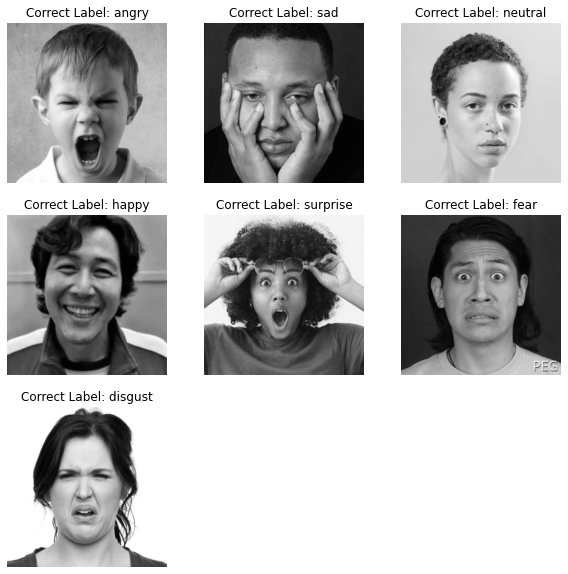

In [ ]:
# Load Test files
!rm -r input_files.zip
gdown.download('https://drive.google.com/uc?id=13gjQ-4trAIwx-YkM9p29G-fVlRtBlTqm', 'input_files.zip', quiet=False)

# Extract files
!rm -r input_files
!unzip input_files.zip -d input_files

# Load Images
import os
image_paths = os.listdir('input_files')

# Preprocess input images
images = np.array([
          transform_input(
              Image.open(f'input_files/{image_path}')
          ) for image_path in image_paths
])

image_labels = [
                 image_path.split('.')[0] for image_path in image_paths
]

# Visualize #

# Initialize Figure
plt.figure(figsize=(10, 10))
figures = len(images)
# Iterate over train dataset first batch
for i, image in enumerate(images):
  # Subplot
  ax = plt.subplot(3, 3, i + 1)

  # Show data
  plt.imshow(image, cmap="gray")
  plt.title('Correct Label: ' + image_labels[i])
  plt.axis("off")

##### Perform

Accuracy (Simple CNN): 0.14285714285714285
Accuracy (Simple Xception): 0.14285714285714285
Accuracy (Transfer Xception): 0.5714285714285714
Accuracy (Transfer DenseNet201): 0.2857142857142857


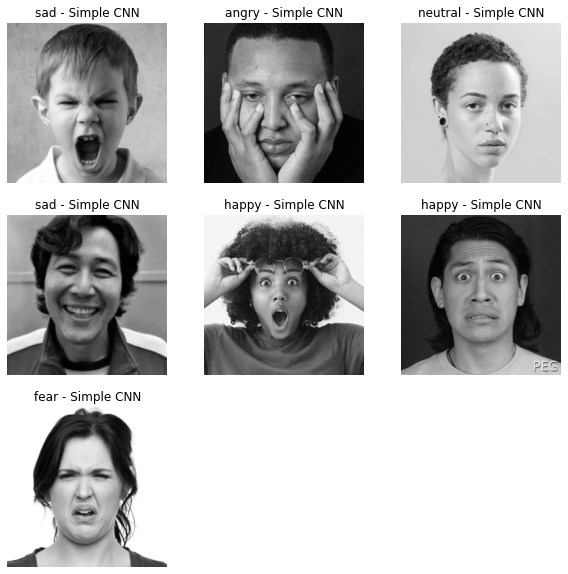

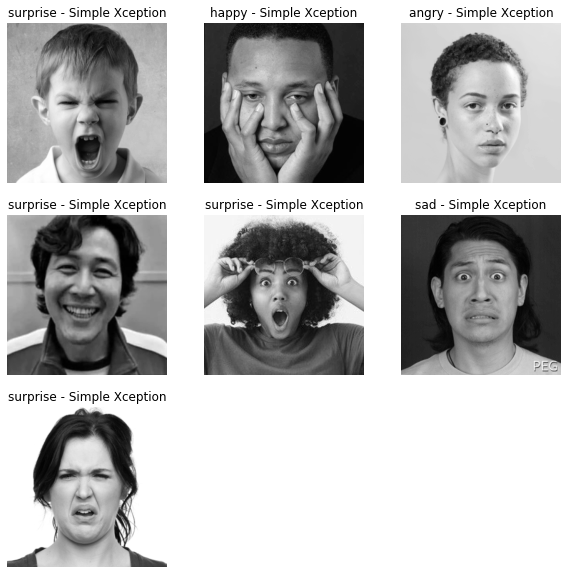

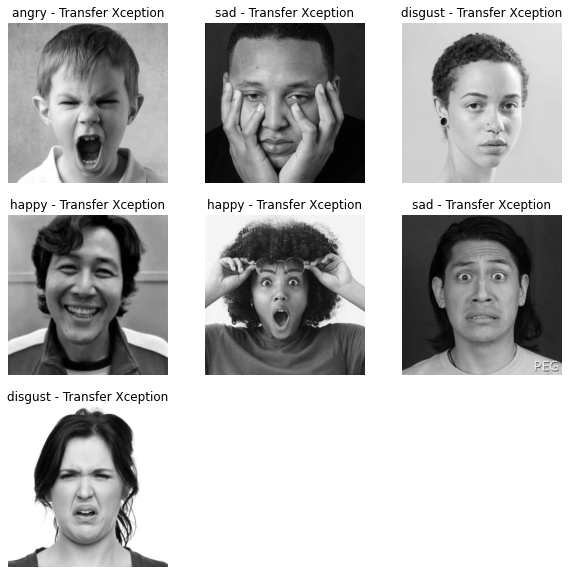

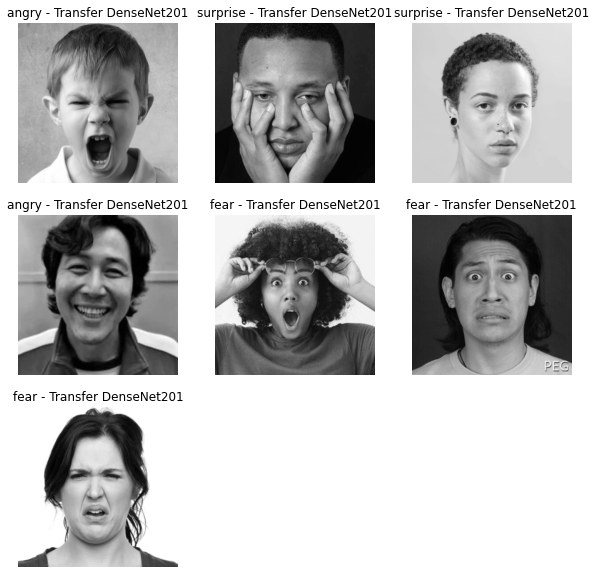

In [ ]:
# Predictions
simple_cnn_predictions = predict(images, simple_cnn_model)
simple_xception_predictions = predict(images, simple_xception_model)
transfer_xception_predictions = predict(images, transfer_xception_model)
transfer_densenet201_predictions = predict(images, transfer_densenet201_model)

# Visualize predictions
print('Accuracy (Simple CNN):', accuracy_score(image_labels, simple_cnn_predictions))
show_predictions(images, simple_cnn_predictions, 'Simple CNN')

print('Accuracy (Simple Xception):', accuracy_score(image_labels, simple_xception_predictions))
show_predictions(images, simple_xception_predictions, 'Simple Xception')

print('Accuracy (Transfer Xception):', accuracy_score(image_labels, transfer_xception_predictions))
show_predictions(images, transfer_xception_predictions, 'Transfer Xception')

print('Accuracy (Transfer DenseNet201):', accuracy_score(image_labels, transfer_densenet201_predictions))
show_predictions(images, transfer_densenet201_predictions, 'Transfer DenseNet201')

#### External Input

Por favor, faça o upload dos pesos do modelo ('model_weights.h5'):


Saving model_weights.h5 to model_weights.h5
Por favor, faça o upload de imagens quadradas:


Saving angry.png to angry.png
Saving disgust.png to disgust.png
Saving fear.png to fear.png
Saving happy.png to happy.png
Saving neutral.png to neutral.png
Saving sad.png to sad.png
Saving surprise.png to surprise.png


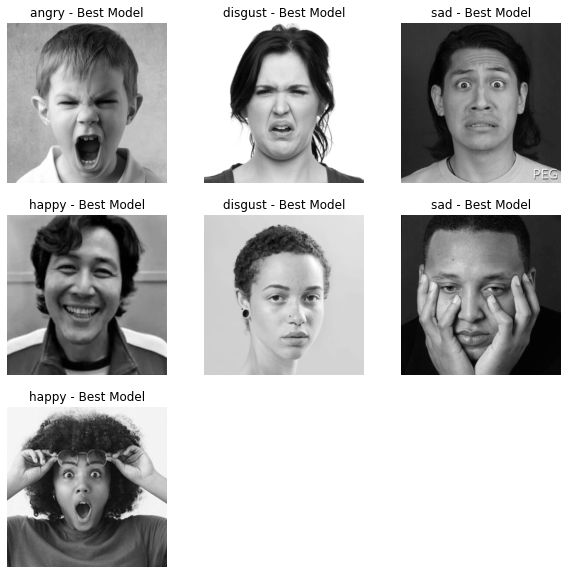

In [44]:
# Load Model and Images
images, best_model = load_input()

# Prediction
predictions = predict(images, best_model)

# Visualize predictions
show_predictions(images, predictions, 'Best Model')